In [1]:
!pip3 install --upgrade tf-nightly tb-nightly

     |████████████████████████████████| 391.9MB 35kB/s 
     |████████████████████████████████| 10.6MB 37.7MB/s 
     |████████████████████████████████| 471kB 40.4MB/s 


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [4]:
experiment_id = "P7EkvFxPQgSWGqAPhE7w2A"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

run             tag  step     value
0          100X/1/train  epoch_accuracy     0  0.741135
1          100X/1/train  epoch_accuracy     1  0.833333
2          100X/1/train  epoch_accuracy     2  0.895390
3          100X/1/train  epoch_accuracy     3  0.890957
4          100X/1/train  epoch_accuracy     4  0.900709
...                 ...             ...   ...       ...
11995  40X/5/validation      epoch_loss   145  0.446906
11996  40X/5/validation      epoch_loss   146  0.444106
11997  40X/5/validation      epoch_loss   147  0.442627
11998  40X/5/validation      epoch_loss   148  0.451300
11999  40X/5/validation      epoch_loss   149  0.448892

[12000 rows x 4 columns]

In [5]:
print(df["run"].unique())
print(df["tag"].unique())

['100X/1/train' '100X/1/validation' '100X/2/train' '100X/2/validation'
 '100X/3/train' '100X/3/validation' '100X/4/train' '100X/4/validation'
 '100X/5/train' '100X/5/validation' '200X/1/train' '200X/1/validation'
 '200X/2/train' '200X/2/validation' '200X/3/train' '200X/3/validation'
 '200X/4/train' '200X/4/validation' '200X/5/train' '200X/5/validation'
 '400X/1/train' '400X/1/validation' '400X/2/train' '400X/2/validation'
 '400X/3/train' '400X/3/validation' '400X/4/train' '400X/4/validation'
 '400X/5/train' '400X/5/validation' '40X/1/train' '40X/1/validation'
 '40X/2/train' '40X/2/validation' '40X/3/train' '40X/3/validation'
 '40X/4/train' '40X/4/validation' '40X/5/train' '40X/5/validation']
['epoch_accuracy' 'epoch_loss']


In [6]:
dfw = experiment.get_scalars(pivot=True) 
dfw

run  step  epoch_accuracy  epoch_loss
0         100X/1/train     0        0.741135    4.173777
1         100X/1/train     1        0.833333    2.221538
2         100X/1/train     2        0.895390    1.347440
3         100X/1/train     3        0.890957    1.166784
4         100X/1/train     4        0.900709    0.986993
...                ...   ...             ...         ...
5995  40X/5/validation   145        0.983240    0.446906
5996  40X/5/validation   146        0.983240    0.444106
5997  40X/5/validation   147        0.983240    0.442627
5998  40X/5/validation   148        0.983240    0.451300
5999  40X/5/validation   149        0.983240    0.448892

[6000 rows x 4 columns]

In [24]:
dfw = dfw.rename(columns={'run': 'Magnification Factor', 
                          'epoch_accuracy': 'Validation Accuracy',
                          'epoch_loss': 'Validation Loss',
                          'step': 'Epochs'})

In [25]:
sns.set_style('whitegrid')

In [26]:
from matplotlib import legend

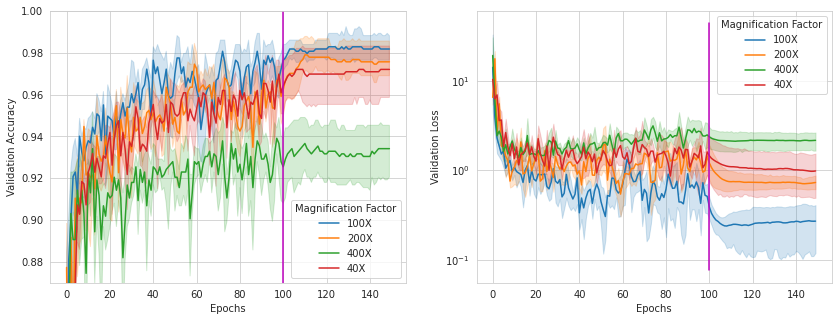

In [32]:
dfw_validation = dfw[dfw['Magnification Factor'].str.endswith("/validation")]

optimizer_validation = dfw_validation['Magnification Factor'].apply(lambda run: run.split("/")[0])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=dfw_validation, x="Epochs", y="Validation Accuracy",
             hue=optimizer_validation)
plt.ylim([0.87, 1.0])

lim_y = plt.ylim()
ft_line = plt.plot([100, 100], lim_y, 'm-')


plt.subplot(1, 2, 2)
sns.lineplot(data=dfw_validation, x="Epochs", y="Validation Loss",
             hue=optimizer_validation)
plt.gca().set_yscale('log')
lim_y = plt.ylim()
ft_line = plt.plot([100, 100], lim_y, 'm-')

plt.savefig("validation_plot.pdf")